In [ ]:
import hashlib
import hmac
import math
import csv
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = '/content/drive/MyDrive/Aviator/Data1/data(1).csv'
data = pd.read_csv(path)
print(data)

        Unnamed: 0   Odd  Odd_Categoria  odd_entrada  \
0                0  1.15              3         11.0   
1                1  1.19              3          3.0   
2                2  5.92             10          3.0   
3                3  1.11              2         10.0   
4                4  1.06              2          2.0   
...            ...   ...            ...          ...   
999984      999984  1.71              6         10.0   
999985      999985  5.16             10          6.0   
999986      999986  1.23              3         10.0   
999987      999987  9.00             10          3.0   
999988      999988  2.26              7         10.0   

        odd_categoria_media_movel5  odd_categoria_media_movel10  \
0                              6.4                          6.5   
1                              5.8                          6.1   
2                              5.0                          5.7   
3                              6.4                         

In [ ]:
data1 = data
data = data[['Odd']]

In [ ]:
for i in range(0,len(data)):
  if data['Odd'][i] == 0:
    data['Odd'][i] = 1
data.describe()

,Odd
count,999989.000000
mean,13.521328
std,936.121428
min,1.000000
25%,1.310000
50%,1.970000
75%,3.930000
max,571831.230000


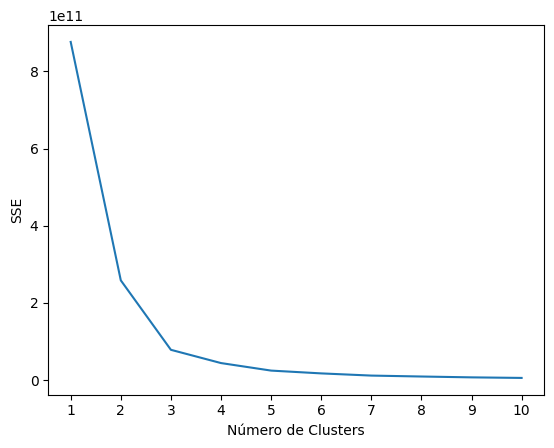

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suponha que 'odd_real' é sua coluna de interesse.
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Odd']].values)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = data[['Odd']].values  # Substitua por seus dados reais

silhouette_scores = []
sse = []
for k in range(2, 11):  # O coeficiente de silhueta não pode ser calculado para k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Número de clusters: {k}, Score de Silhueta: {score}")

# Plot SSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Score de Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Score de Silhueta')
plt.tight_layout()
plt.show()


Número de clusters: 2, Score de Silhueta: 0.9999612275944402
Número de clusters: 3, Score de Silhueta: 0.9997984748786889
Número de clusters: 4, Score de Silhueta: 0.9993473009982665
Número de clusters: 5, Score de Silhueta: 0.999187999329518
Número de clusters: 6, Score de Silhueta: 0.9980933853390739
Número de clusters: 7, Score de Silhueta: 0.9973836050348956


In [ ]:
quantiles = data['Odd'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
print(quantiles)

0.1    1.09
0.2    1.23
0.3    1.41
0.4    1.64
0.5    1.97
0.6    2.45
0.7    3.28
0.8    4.91
0.9    9.82
Name: Odd, dtype: float64


In [ ]:
import pandas as pd

# Supondo que 'data' é o seu DataFrame e 'Odd' é a coluna que você está categorizando
quantiles = data['Odd'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Cria uma nova coluna 'Odd_Category' com os rótulos de categoria
# Os bins são os limites entre as categorias, e você pode ajustá-los conforme necessário
bins = [data['Odd'].min()] + quantiles.tolist() + [data['Odd'].max()]
labels = range(1, len(bins))

data['Odd_Categoria1'] = pd.cut(data['Odd'], bins=bins, labels=labels, include_lowest=True)

# Verifica a distribuição das novas categorias
print(data['Odd_Categoria1'].value_counts())
